In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load data
df = pd.read_csv("california housing.csv")

#Set display options to show all rows and columns
pd.set_option('display.max_columns', None)

#Count missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)

#207 Missing values in total_bedrooms column
#Impute with median
median_value = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_value, inplace=True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [2]:
#Convert categorical column using one-hot encoding

ocean_proximity_categories = df['ocean_proximity'].unique()
print(ocean_proximity_categories)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df[['ocean_proximity']])
print(df_encoded.toarray())

#Concatenate the original DataFrame and the one-hot encoded DataFrame
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out(['ocean_proximity']))
df = pd.concat([df, df_encoded], axis=1)

#Remove unneeded categorical column from df
df.drop('ocean_proximity', axis=1, inplace=True)
print(df)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43              

In [3]:
#Exploratory Analysis
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


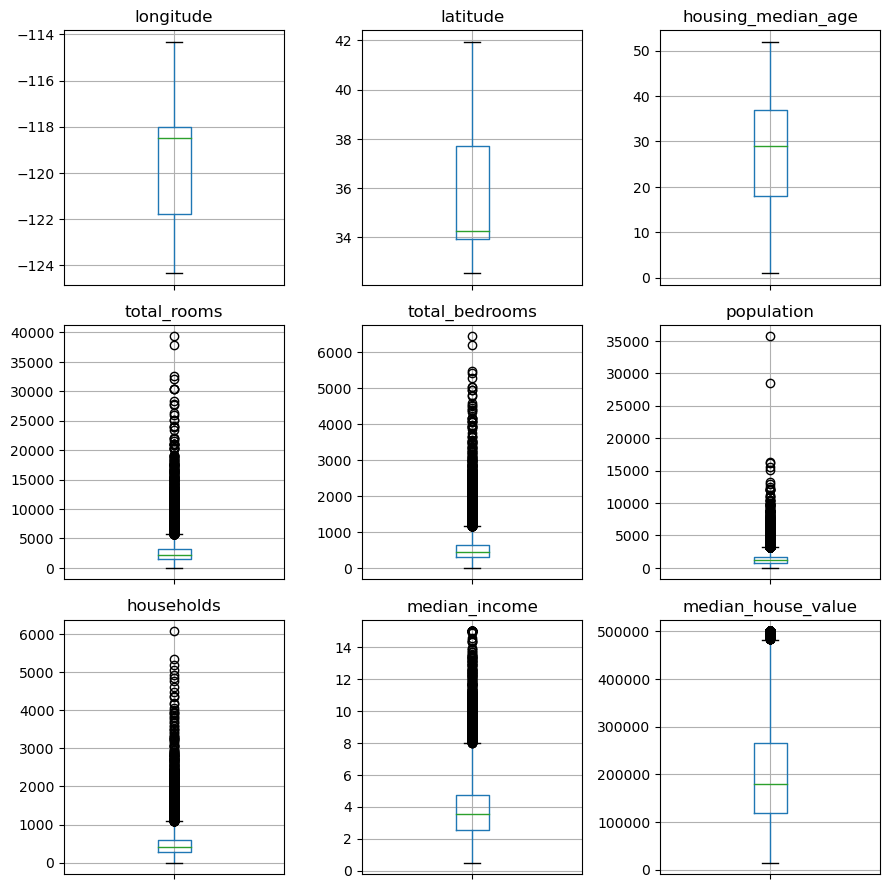

In [4]:
#Boxplot matrix
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

for i, column in enumerate(df.columns[:9]):
    ax = axes[i//3, i%3]  # Correct indexing
    df.boxplot(column, ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # Remove x-axis labels
    
plt.tight_layout()
plt.show()

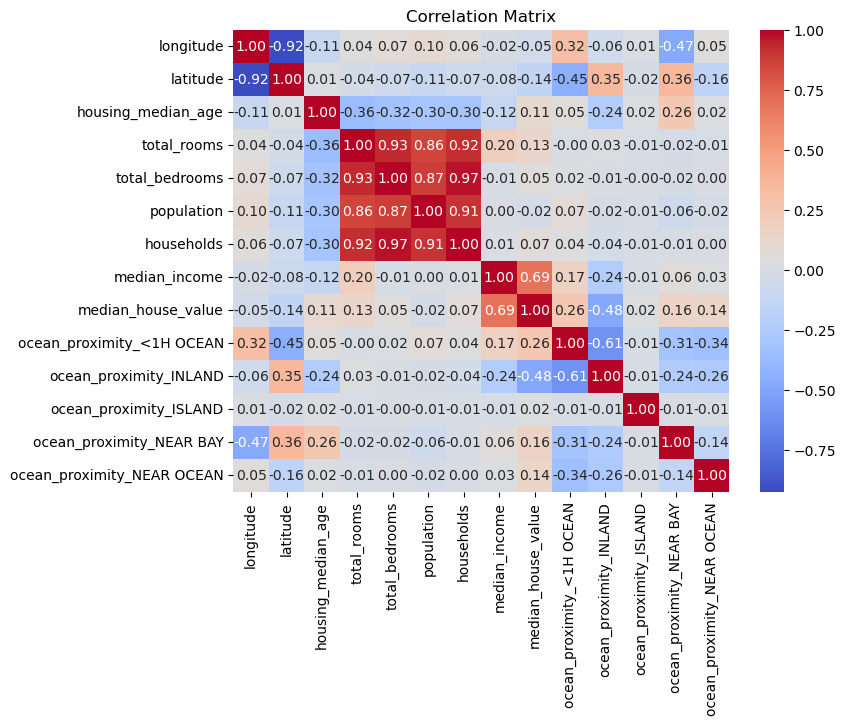

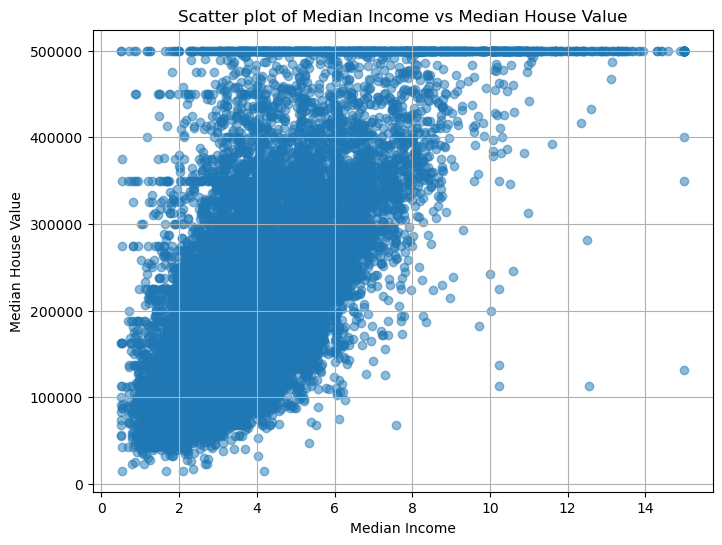

In [5]:
#Correlation plot
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot median income and median house value
plt.figure(figsize=(8, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.title('Scatter plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

In [6]:
#Scale/normalise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                     'total_bedrooms', 'population', 'households', 'median_income',
                                     'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 
                                     'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
                                     'ocean_proximity_NEAR OCEAN']])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                     'total_bedrooms', 'population', 'households', 'median_income',
                                     'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 
                                     'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
                                     'ocean_proximity_NEAR OCEAN'])

# Add unscaled dependent variable back to new scaled df
df_scaled['median_house_value'] = df['median_house_value']

In [7]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = np.array(df_scaled.drop(["median_house_value"], 1))
y = np.array(df_scaled["median_house_value"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/var/folders/f1/5ngcq0j55n564_2fg1nt94480000gn/T/ipykernel_23894/168579177.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_scaled.drop(["median_house_value"], 1))


In [8]:
#Model Selection

#Check for multicolinearity before selecting linear model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# Calculate VIF
vif = calculate_vif(df_scaled.drop(columns=["median_house_value"]))  # Exclude the target variable
print(vif)

                       Feature        VIF
0                    longitude  18.022091
1                     latitude  19.925764
2           housing_median_age   1.321908
3                  total_rooms  12.348580
4               total_bedrooms  27.038787
5                   population   6.341162
6                   households  28.313741
7                median_income   1.740400
8    ocean_proximity_<1H OCEAN        inf
9       ocean_proximity_INLAND        inf
10      ocean_proximity_ISLAND        inf
11    ocean_proximity_NEAR BAY        inf
12  ocean_proximity_NEAR OCEAN        inf


/Users/danielhill/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [11]:
#Perform Lasso regression as most variables have high multicollinearity
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Perform Lasso regression
lasso = Lasso(alpha=0.001)  # You can adjust the value of alpha
lasso.fit(X_train, y_train)

# Predicting on the testing set
y_pred_test = lasso.predict(X_test)

# Predicting on the training set
y_pred_train = lasso.predict(X_train)

# Calculating Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculating Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)


feature_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 
                 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 
                 'ocean_proximity_NEAR OCEAN']

# Coefficients of the Lasso model
print("\nCoefficients:")
for feature, coef in zip(feature_names, lasso.coef_):
    print("{}: {:.4f}".format(feature, coef))

Test Set Root Mean Squared Error: 69129.57257968863
Training Set Root Mean Squared Error: 68586.01492645041
Test Set R-squared: 0.6384691576102888
Training Set R-squared: 0.6475444878589114

Coefficients:
longitude: -54091.4893
latitude: -54764.8110
housing_median_age: 13846.1624
total_rooms: -10387.2086
total_bedrooms: 29536.7833
population: -42760.2556
households: 28563.0623
median_income: 74471.4841
ocean_proximity_<1H OCEAN: 7329.0903
ocean_proximity_INLAND: -10690.8640
ocean_proximity_ISLAND: 2743.6026
ocean_proximity_NEAR BAY: 3293.0158
ocean_proximity_NEAR OCEAN: 6807.4165


/Users/danielhill/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e+12, tolerance: 2.066e+10
  model = cd_fast.enet_coordinate_descent(


In [12]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
decision_tree = DecisionTreeRegressor(max_depth=10, random_state=0) 

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = decision_tree.predict(X_test)

# Predict on the training set
y_pred_train = decision_tree.predict(X_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 62308.12420093675
Training Set Root Mean Squared Error: 48140.549572744836
Test Set R-squared: 0.706297959661578
Training Set R-squared: 0.8263578096550449


In [13]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Model
gradient_boosting = GradientBoostingRegressor(random_state=0)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = gradient_boosting.predict(X_test)

# Predict on the training set
y_pred_train = gradient_boosting.predict(X_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 55289.971902825695
Training Set Root Mean Squared Error: 53074.25033859848
Test Set R-squared: 0.7687347671661549
Training Set R-squared: 0.7889424439779408


In [14]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
random_forest = RandomForestRegressor(random_state=0)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = random_forest.predict(X_test)

# Predict on the training set
y_pred_train = random_forest.predict(X_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 49274.65216937559
Training Set Root Mean Squared Error: 18432.5513505349
Test Set R-squared: 0.816318784667056
Training Set R-squared: 0.9745431846391885


In [15]:
#Support vector machine
from sklearn.svm import SVR

# Create Support Vector Machine Regression model
svm_regressor = SVR(kernel="rbf", C=1000, gamma=0.1, epsilon=0.1)

# Train the model
svm_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = svm_regressor.predict(X_test)

# Predict on the training set
y_pred_train = svm_regressor.predict(X_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 72135.69088021333
Training Set Root Mean Squared Error: 72995.4486023836
Test Set R-squared: 0.6063429796351252
Training Set R-squared: 0.6007685633842416


Feature ranking:
1. median_income (0.491768)
2. ocean_proximity_INLAND (0.139583)
3. longitude (0.105704)
4. latitude (0.100195)
5. housing_median_age (0.053542)
6. population (0.032706)
7. total_rooms (0.024042)
8. total_bedrooms (0.021983)
9. households (0.018952)
10. ocean_proximity_NEAR OCEAN (0.006820)
11. ocean_proximity_<1H OCEAN (0.003439)
12. ocean_proximity_NEAR BAY (0.001086)
13. ocean_proximity_ISLAND (0.000179)


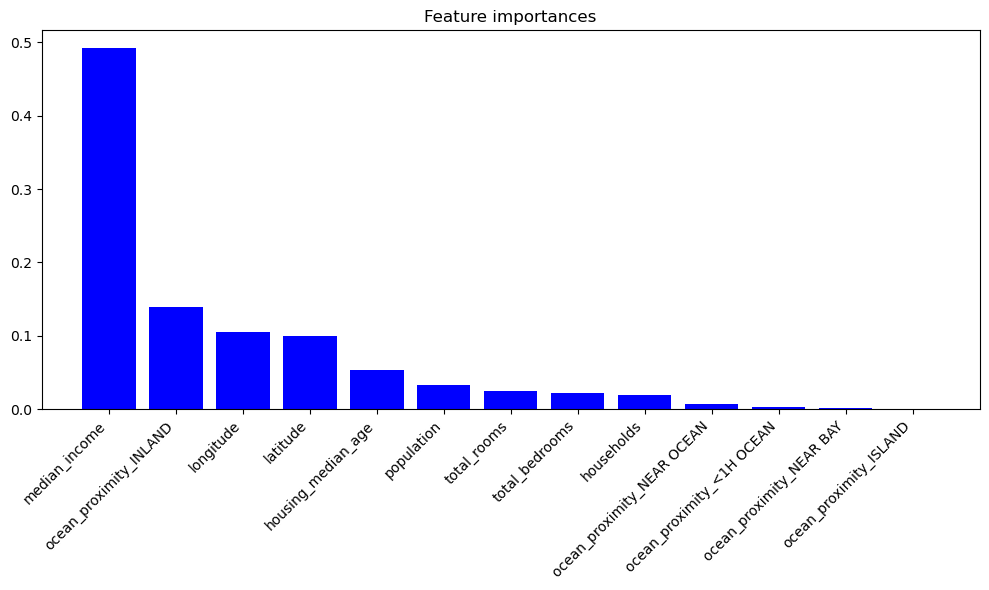

In [18]:
#Perform feature selection on RF model
feature_importances = random_forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking with renamed features
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

#Remove variables with low importance
df_subset = pd.DataFrame(df_scaled, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                     'total_bedrooms', 'population', 'households', 'median_income',
                                     'median_house_value', 'ocean_proximity_INLAND'])

In [19]:
#Test different train/test splits
X = np.array(df_subset.drop(["median_house_value"], 1))
y = np.array(df_subset["median_house_value"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=0)

/var/folders/f1/5ngcq0j55n564_2fg1nt94480000gn/T/ipykernel_23894/1342426099.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_subset.drop(["median_house_value"], 1))


In [20]:
#80/20 split
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = random_forest.predict(X_test)

# Predict on the training set
y_pred_train = random_forest.predict(X_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 48161.581544164634
Training Set Root Mean Squared Error: 18397.708778052434
Test Set R-squared: 0.8221151718730777
Training Set R-squared: 0.9747098852463031


In [21]:
#70/30 split
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train2, y_train2)

# Predict on the testing set
y_pred_test = random_forest.predict(X_test2)

# Predict on the training set
y_pred_train = random_forest.predict(X_train2)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test2, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train2, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test2, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train2, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 49756.81741927664
Training Set Root Mean Squared Error: 18388.42800339931
Test Set R-squared: 0.8143059892883542
Training Set R-squared: 0.9745921719532928


In [22]:
#60/40 split
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train3, y_train3)

# Predict on the testing set
y_pred_test = random_forest.predict(X_test3)

# Predict on the training set
y_pred_train = random_forest.predict(X_train3)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test3, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train3, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test3, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train3, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Test Set Root Mean Squared Error: 50380.47822677253
Training Set Root Mean Squared Error: 18554.665775579553
Test Set R-squared: 0.8096632394219067
Training Set R-squared: 0.9741191065495267


In [23]:
#Get the parameters of 80/20 model
params = random_forest.get_params()
print("Parameters of the trained Random Forest model:")
print(params)

Parameters of the trained Random Forest model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [24]:
#Randomised search CV
#WARNING: Takes 15-20 minutes to run
from sklearn.model_selection import RandomizedSearchCV

#Number of trees to test
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Random search of parameters, using 3 fold cross validation, 100 different combinations
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

# Best model
best_model = rf_random.best_estimator_

# Predict on the testing set
y_pred_test = best_model.predict(X_test)

# Predict on the training set
y_pred_train = best_model.predict(X_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate R-squared for testing set
r_squared_test = r2_score(y_test, y_pred_test)
print("Test Set R-squared:", r_squared_test)

# Calculate R-squared for training set
r_squared_train = r2_score(y_train, y_pred_train)
print("Training Set R-squared:", r_squared_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=266; total time=   7.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=266; total time=  13.1s


/Users/danielhill/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=266; total time=   7.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=483; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=483; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=483; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=483; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=483; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, 

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1350; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1350; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1350; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1350; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1350; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1133; total time=  47.2s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1133; total time=  47.1s
[CV] END bootstrap=Tru

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1133; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=  31.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=  28.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1350; total time=  35.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1566; total time= 1.1min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=916; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, 

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1350; total time=  58.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 1.7min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1133; total time=  33.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 1.7min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=  19.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1783; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=266; total time=  13.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=266; total time=  10.4s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1133; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1133; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1133; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=483; total time=   0.0s
[CV] END bootstrap=False, max_depth

/Users/danielhill/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/danielhill/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/danielhill/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/danielhill/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_const

Test Set Root Mean Squared Error: 47901.642567840565
Training Set Root Mean Squared Error: 0.36607283758787823
Test Set R-squared: 0.8240301595842121
Training Set R-squared: 0.9999999999899871


Training Set Root Mean Squared Error: 18397.708778052434
Test Set Root Mean Squared Error: 48161.581544164634
Training Set R-squared: 0.9747098852463031
Test Set R-squared: 0.8221151718730777


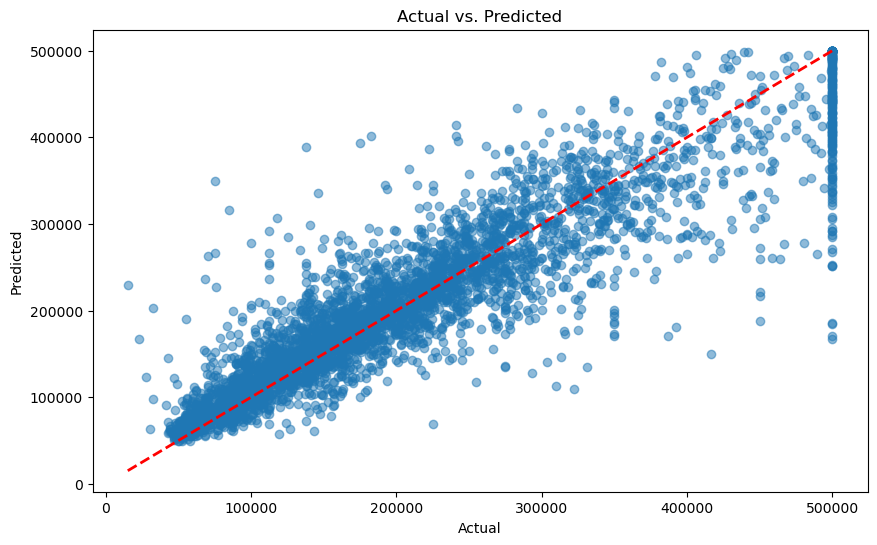

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=916; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=916; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=916; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1566; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1783; total time=   0.0s
[CV] END bootstrap=False, max_depth=9

[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=916; total time=  29.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=266; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1566; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1566; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1566; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1350; total time= 1.0min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END bootstrap=True, max_depth=10

In [25]:
# Original parameters had best performance, will use those in optimal model
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training Set Root Mean Squared Error:", rmse_train)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set Root Mean Squared Error:", rmse_test)

# Calculate R-squared for training set
r_squared_train = random_forest.score(X_train, y_train)
print("Training Set R-squared:", r_squared_train)

# Calculate R-squared for testing set
r_squared_test = random_forest.score(X_test, y_test)
print("Test Set R-squared:", r_squared_test)

#Actual v predicted scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Red 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()